In [87]:
import nltk 
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter

In [88]:
nltk.download('punkt')
nltk.data.path.append('.')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshkulkarni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
# Load, tokenize and process the data
import re                                                           
with open('shakespeare.txt') as f:
    data = f.read()                                                 
data = re.sub(r'[,!?;-]', '.',data)                                 
data = nltk.word_tokenize(data)                                     
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    
print("Number of tokens:", len(data),'\n', data[:15])                    

Number of tokens: 60976 
 ['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


In [90]:
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) 

Size of vocabulary:  5775
Most frequent tokens:  [('.', 9630), ('the', 1521), ('and', 1394), ('i', 1257), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('a', 752), ('you', 748), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


In [91]:
from utlis2 import *

In [92]:

word2Ind,Ind2word=get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)


Size of vocabulary:  5775


In [93]:
print("Index of the word 'king' :  ",word2Ind['king'] )
print("Word which has index 2743:  ",Ind2word[2743] )

Index of the word 'king' :   2744
Word which has index 2743:   kinds


In [94]:
def initialize_model(N,V, random_seed=1):
    np.random.seed(random_seed)
    W1=np.random.rand(N,V)
    b1=np.random.rand(N,1)
    W2=np.random.rand(V,N)
    b2=np.random.rand(V,1)
    return W1, W2, b1, b2

In [95]:
#testing initialize_model
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)
assert tmp_W1.shape == ((tmp_N, tmp_V))
assert tmp_W2.shape == ((tmp_V, tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")


tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


In [96]:
def softmax(z):
    yhat=np.exp(z)
    sum=np.sum(yhat,axis=0)
    # print(sum)
    yhat=np.divide(yhat,sum)
    return yhat

In [97]:
# Test the function
tmp = np.array([[1, 2, 3],
                [1, 1, 1]
                ])
tmp_sm = softmax(tmp)
display(tmp_sm)


array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

In [98]:
def reLU(z):
    A=np.maximum(0,z)
    return A

In [99]:
def forward_prop(x, W1, W2, b1, b2):
    h=np.dot(W1,x)+b1
    h=reLU(h)
    z=np.dot(W2,h)+b2
    return z,h

In [100]:
# Test the function

# Create some inputs
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0, 1, 0]]).T
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(
    N=tmp_N, V=tmp_V, random_seed=1)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

# call function
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward_prop")
print()
# Look at output
print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print()

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)


x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.65235935]
 [1.38784779]
 [1.03496989]]

h has shape (2, 1)
h has values:
[[0.9065847 ]
 [0.49231662]]


In [101]:
# compute_cost: cross-entropy cost functioN
def compute_cost(y, yhat, batch_size):
    # cost function 
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost


In [102]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind,
                    tmp_V, tmp_C, tmp_batch_size))

print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")


tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (5775, 4)
call compute_cost
tmp_cost 11.0519


In [103]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    ll=reLU(np.dot(W2.T,(yhat-y)))
    d_w1=(1/batch_size)*np.dot(ll,x.T)
    d_w2=(1/batch_size)*np.dot((yhat-y),h.T)
    d_b1 = np.sum((1/batch_size)*np.dot(ll, x.T), axis=1, keepdims=True)
    d_b2 = np.sum((1/batch_size)*np.dot((yhat-y), h.T), axis=1, keepdims=True)
    return d_w1, d_w2, d_b1,d_b2


In [104]:
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

# get a batch of data
tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind,
                    tmp_V, tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = (2*tmp_C)
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(
    tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")


get a batch of data
tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)

Initialize weights and biases
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)

Forwad prop to get z and h
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (5775, 4)

call back_prop
tmp_grad_W1.shape (50, 5775)
tmp_grad_W2.shape (5775, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (5775, 1)


In [105]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):
    
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        z, h = forward_prop(x, W1, W2, b1, b2)
        yhat = softmax(z)
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 -= alpha*grad_W1 
        W2 -= alpha*grad_W2
        b1 -= alpha*grad_b1
        b2 -= alpha*grad_b2
        
        ### END CODE HERE ###
        iters += 1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
    return W1, W2, b1, b2


In [106]:
C = 2
N = 300
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)


Call gradient_descent
iters: 10 cost: 0.000280
iters: 20 cost: 0.000273
iters: 30 cost: 0.000266
iters: 40 cost: 0.000259
iters: 50 cost: 0.000252
iters: 60 cost: 0.000246
iters: 70 cost: 0.000241
iters: 80 cost: 0.000235
iters: 90 cost: 0.000230
iters: 100 cost: 0.000225
iters: 110 cost: 0.000221
iters: 120 cost: 0.000218
iters: 130 cost: 0.000215
iters: 140 cost: 0.000212
iters: 150 cost: 0.000209


In [107]:
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['king', 'queen', 'lord', 'man', 'woman', 'dog', 'wolf',
         'rich', 'happy', 'sad']

embs = (W1.T + W2)/2.0
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)


(10, 300) [2744, 3949, 2960, 3022, 5672, 1452, 5671, 4189, 2315, 4276]


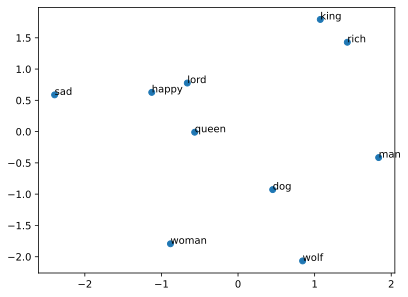

In [108]:
result = compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


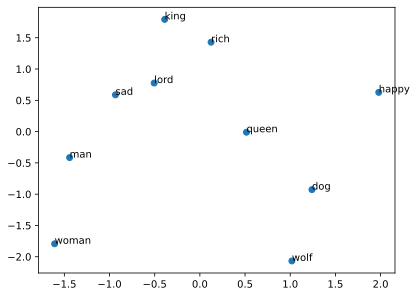

In [109]:
result = compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()
